In [127]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12),
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [128]:
import pandas as pd
import os

def load_police_data():
    csv_path = os.path.join(os.path.join("police_data"), "crimes_2012_to_2017.csv")
    return pd.read_csv(csv_path, index_col=0)

## Load Data and get basic info about shape and values

In [129]:
police_data = load_police_data()
print(f'Shape of table: {police_data.shape}')
# Show Unique value count for each column
print(f'Unique values per column: \n{police_data.nunique()}')
police_data.tail(2)

Shape of table: (1456714, 22)
Unique values per column: 
ID                      1456714
Case Number             1456598
Date                     582146
Block                     32774
IUCR                        365
Primary Type                 33
Description                 342
Location Description        142
Arrest                        2
Domestic                      2
Beat                        302
District                     24
Ward                         50
Community Area               78
FBI Code                     26
X Coordinate              67714
Y Coordinate             111555
Year                          6
Updated On                  959
Latitude                 368076
Longitude                367942
Location                 368286
dtype: int64


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,False,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


## Format Data, drop/rename/add columns, convert to timeseries etc

In [130]:
drop_attributes = ['Location',
                   'ID',
                   'Case Number',
                   'IUCR',
                   'Block',
                   'Ward',
                   'Primary Type',
                   'Beat',
                   'X Coordinate',
                   'Community Area',
                   'Year',
                   'Latitude',
                   'Longitude',
                   'Y Coordinate',
                   'Updated On',
                   'Description',
                   'Location Description']

police_data = police_data.drop(columns=drop_attributes)

# Rename columns
police_data.rename(columns={
    'Arrest': 'Arrest Status',
    'Domestic': 'Domestic Status'
}, inplace=True)

# Convert to timeseries
# A lot (X50) faster when we provide the format
police_data['Date'] = pd.to_datetime(
    police_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Set datetime as index, will not remove duplicates (verify_integrity=True would remove duplicates)
police_data = police_data.set_index('Date')

# Generate temp columns for plotting distributions
police_data['Year'] = police_data.index.year
police_data['Month'] = police_data.index.month
police_data['Day of the Year'] = police_data.index.day_of_year

# Drop rows with null values
police_data= police_data.dropna()
print(f'Shape of table: {police_data.shape}')

# Show Unique value count for each column
print(f'Unique values per column: \n{police_data.nunique()}')


Shape of table: (1456713, 7)
Unique values per column: 
Arrest Status        2
Domestic Status      2
District            24
FBI Code            26
Year                 6
Month               12
Day of the Year    366
dtype: int64


## Visualize Categorical Values

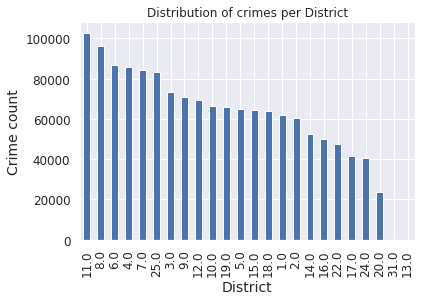

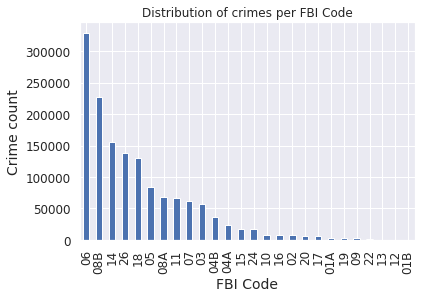

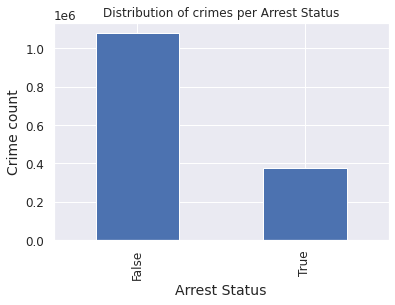

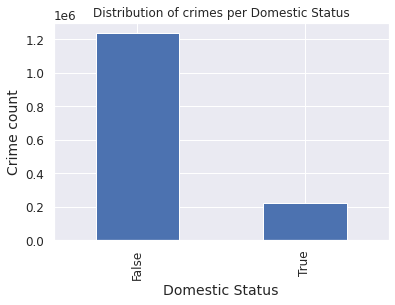

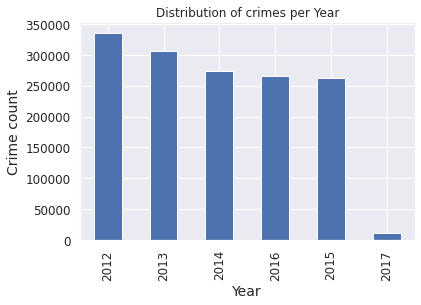

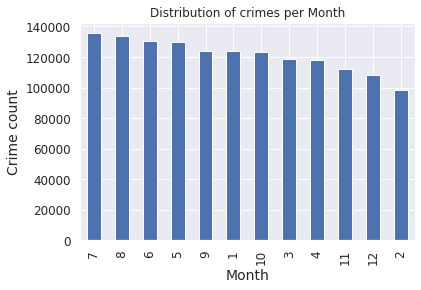

In [131]:
# Print bar diagrams for important columns
columns_hist = [
    'District',
    'FBI Code',
    'Arrest Status',
    'Domestic Status',
    'Year',
    'Month',
]

for column in columns_hist:
    police_data[column].value_counts().plot(kind='bar')
    plt.title(f'Distribution of crimes per {column}')
    plt.xlabel(column)
    plt.ylabel('Crime count')
    plt.show()

drop_attributes = [
    'Year',
    'Month',
    'Day of the Year'
]

police_data = police_data.drop(columns=drop_attributes)


## Timeseries Visualisation

In [132]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(20, 10), 'lines.marker':'o', 'lines.linewidth': 0.5})
# comment out to see all possible keys
# mpl.rcParams.keys()

# this helps with adding plot ticks on certain weekdays etc
import matplotlib.dates as mdates

Text(0.5, 1.0, 'Weekly crime count across 5 years')

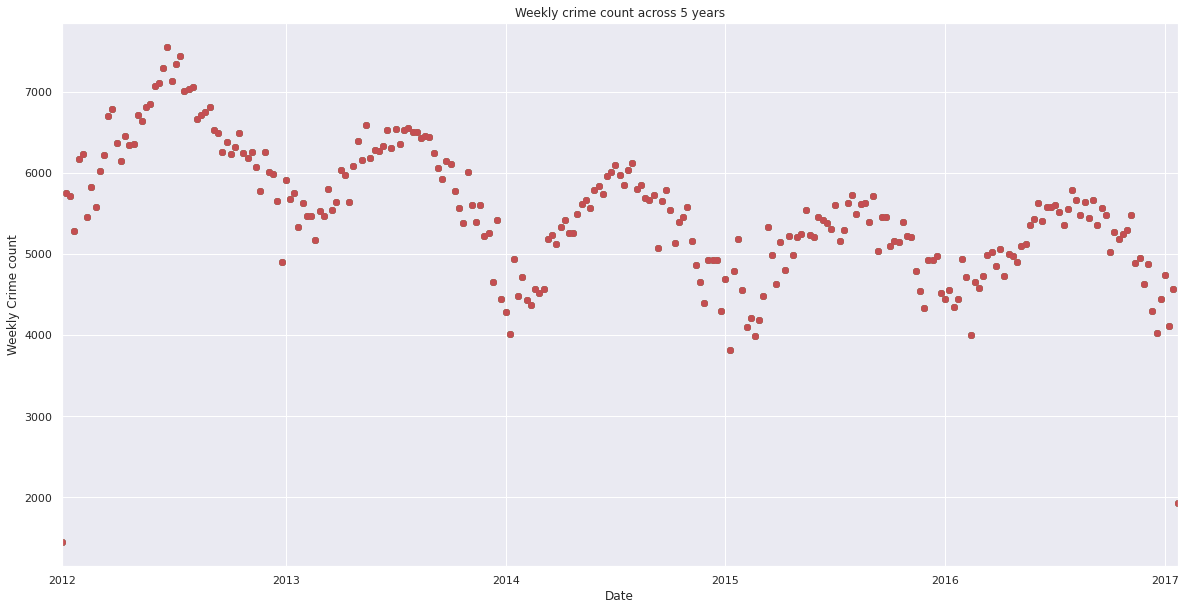

In [133]:
ax = police_data.resample('1W').count().plot(linestyle='None', legend=False)
ax.set_ylabel('Weekly Crime count')
ax.set_title('Weekly crime count across 5 years')

Text(0.5, 1.0, 'Daily crime count over the years 2015-2016')

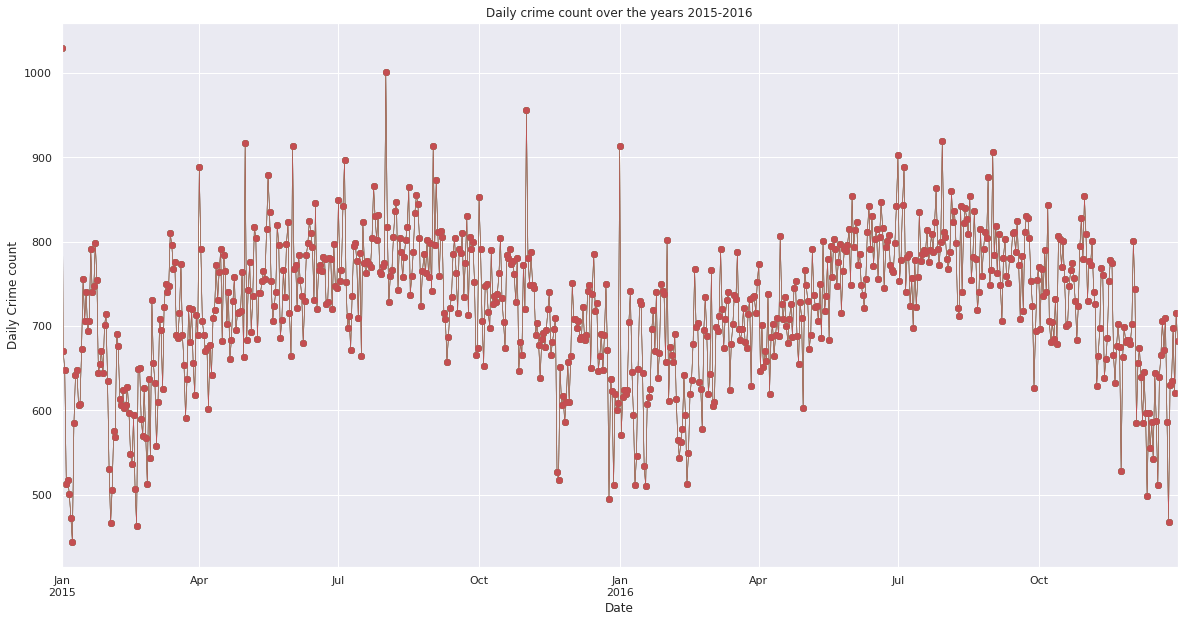

In [134]:
ax = police_data.loc['2015':'2016'].resample('1d').count().plot(linestyle='-', legend=False)
ax.set_ylabel('Daily Crime count')
ax.set_title('Daily crime count over the years 2015-2016')

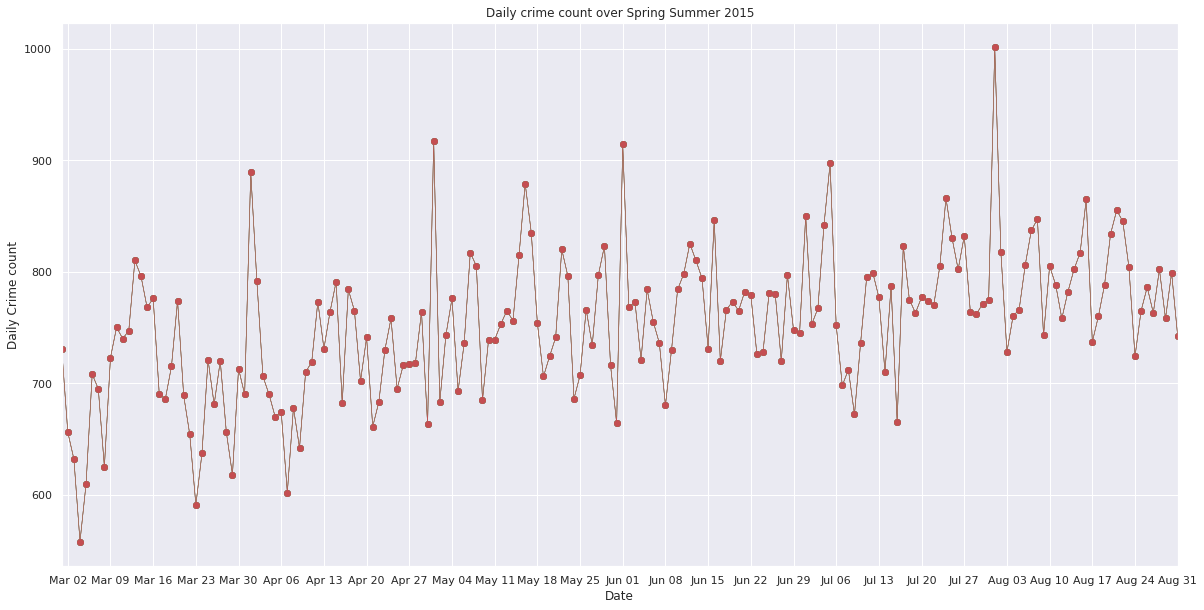

In [135]:
ax = police_data.loc['2015/03':'2015/08'].resample('1d').count().plot(linestyle='-', legend=False)
ax.set_ylabel('Daily Crime count')
ax.set_title('Daily crime count over Spring Summer 2015')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

## Autoregressive Integrated Moving Average Model

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series
  stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


### Prepare Series

In [136]:
# remove all columns
print(f'Shape of table: {police_data.shape}')
drop_attributes = [
    'Arrest Status',
    'Domestic Status',
    'District',
    'FBI Code'
]
police_data = police_data.drop(columns=drop_attributes)


Shape of table: (1456713, 4)


In [144]:
# Create period table, with one column for crime count
print(f'Shape of table before resampling: {police_data.shape}')

police_data['Crime Count'] = ""
# table with monthly period, skip 2017 data cause they are too little
series = police_data.loc[:'2016/12'].resample(rule='1m', kind='period').count()
print(f'Shape of period array: {series.shape}')
print(series.info())
series.tail(2)


Shape of table before resampling: (1456713, 1)
Shape of period array: (60, 1)
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 60 entries, 2012-01 to 2016-12
Freq: M
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Crime Count  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes
None


,Crime Count
Date,
2016-11,21140
2016-12,19580


### Get Autocorrelation

#### The parameters of the ARIMA model are defined as follows:

- **p**: The number of lag observations included in the model, also called the lag order.
- **d**: The number of times that the raw observations are differenced, also called the degree of differencing.
- **q**: The size of the moving average window, also called the order of moving average.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

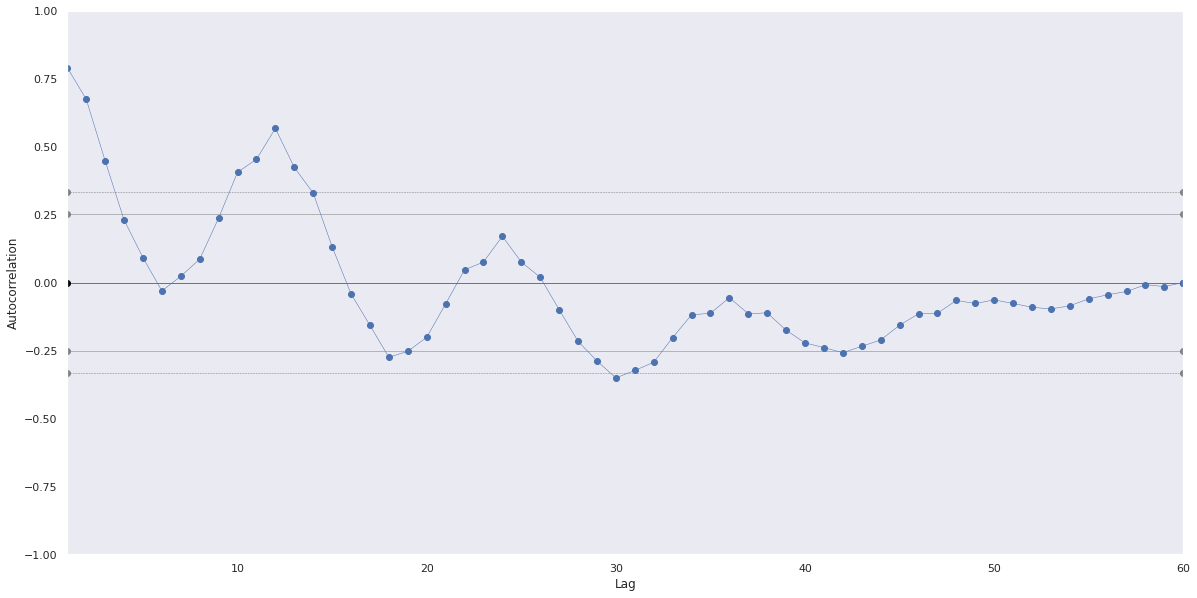

In [145]:
from pandas.plotting import autocorrelation_plot
# This can help as choose the lag to be used in the Arima model, p value
autocorrelation_plot(series)

### First try of training the ARIMA model

                               SARIMAX Results                                
Dep. Variable:            Crime Count   No. Observations:                   60
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -525.667
Date:                Sat, 28 May 2022   AIC                           1063.333
Time:                        17:29:54   BIC                           1075.799
Sample:                    01-31-2012   HQIC                          1068.199
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0931      0.129     -0.719      0.472      -0.347       0.161
ar.L2          0.2703      0.141      1.922      0.055      -0.005       0.546
ar.L3          0.0056      0.144      0.039      0.9

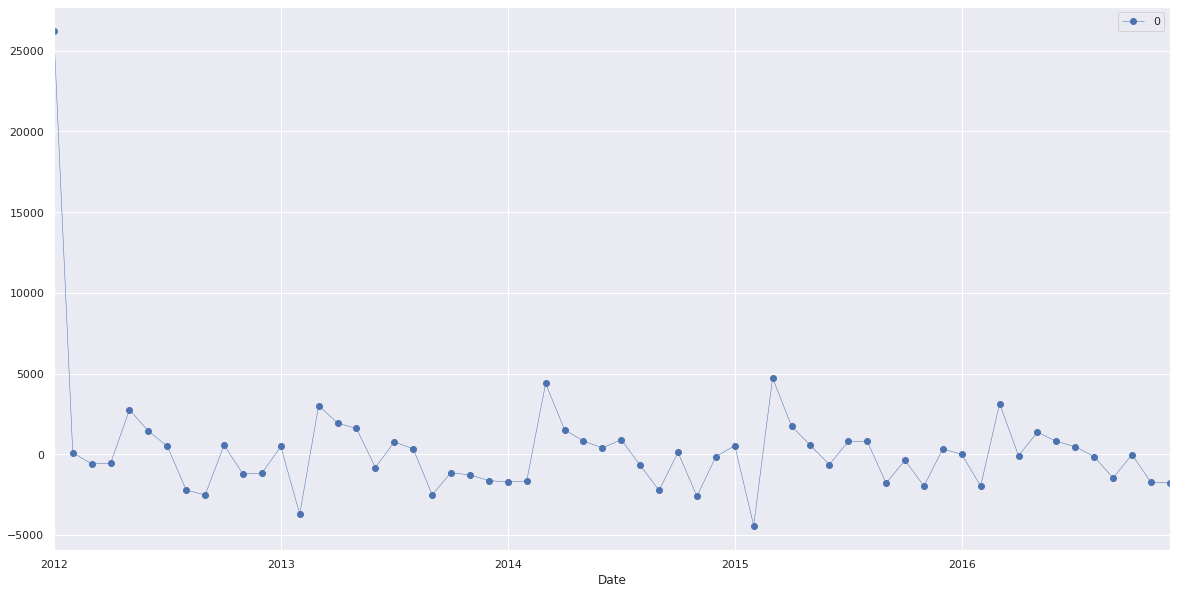

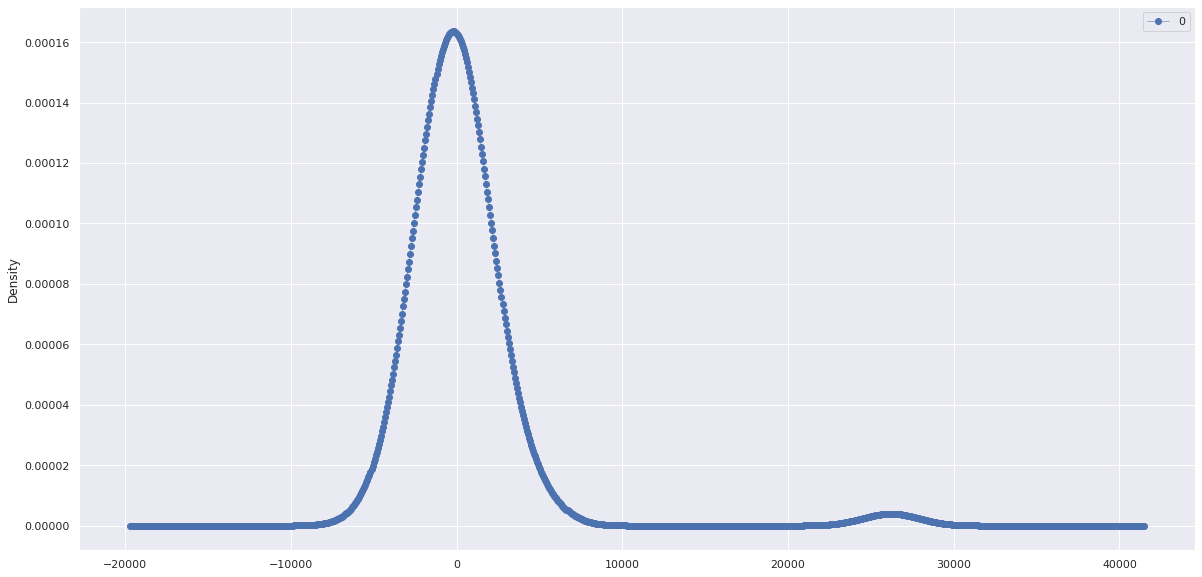

                  0
count     60.000000
mean     302.005751
std     3838.105251
min    -4421.383543
25%    -1512.446698
50%      -17.547771
75%      801.312093
max    26194.000000


In [146]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Split series in train and test, then run a walk-forward train and validation

predicted=19932.677117, expected=21610.000000
predicted=22829.173752, expected=23570.000000
predicted=23485.831309, expected=23059.000000
predicted=23395.232227, expected=24101.000000
predicted=23900.898583, expected=24685.000000
predicted=24852.307508, expected=22996.000000
predicted=23307.884742, expected=22979.000000
predicted=22548.960933, expected=20486.000000
predicted=20708.948195, expected=21006.000000
predicted=20406.906610, expected=20375.000000
predicted=20566.747941, expected=18590.000000
predicted=18661.056480, expected=21878.000000
predicted=21075.744963, expected=20962.000000
predicted=21887.631734, expected=23332.000000
predicted=22937.140528, expected=23791.000000
predicted=24177.447825, expected=24646.000000
predicted=24757.810521, expected=24619.000000
predicted=24723.727942, expected=23235.000000
predicted=23354.491384, expected=23314.000000
predicted=22898.982553, expected=21140.000000
predicted=21374.698260, expected=19580.000000
Test RMSE: 1352.469


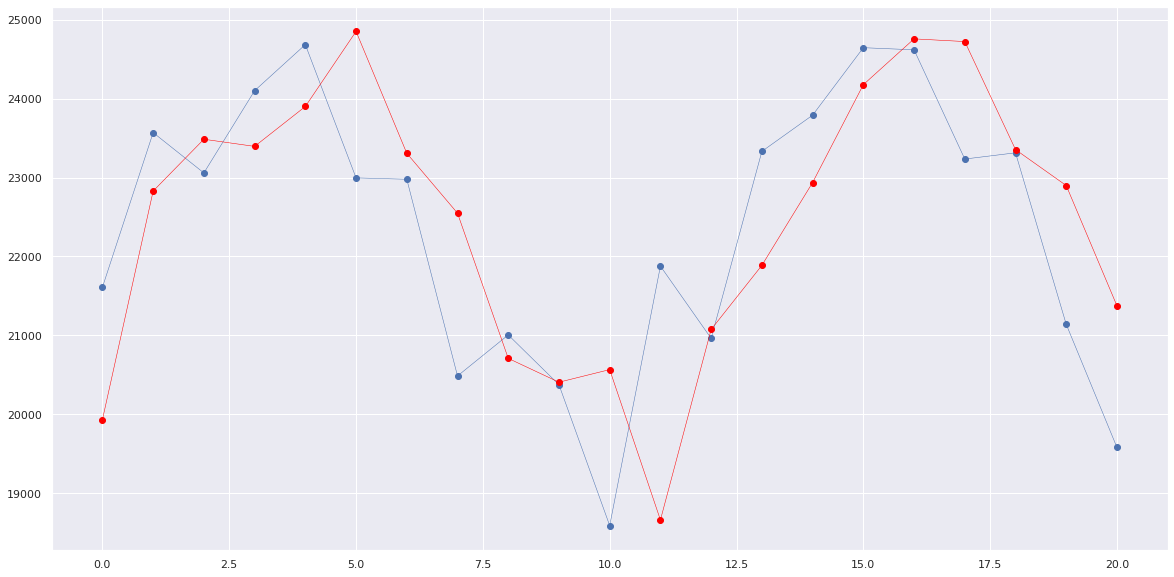

In [154]:
from math import sqrt
from sklearn.metrics import mean_squared_error


def walk_forward_train_evaluate_and_report(series, arima_order):
    # split into train and test sets
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    print('Test RMSE: %.3f' % rmse)
    # plot forecasts against actual outcomes
    plt.plot(test)
    plt.plot(predictions, color='red')
    plt.show()


walk_forward_train_evaluate_and_report(series, (5, 1, 0))


### ARIMA hyperparameters tuning with the Grid Search Method

In [150]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

In [151]:
# supress errors noise
import warnings
warnings.filterwarnings("ignore")

In [152]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
	return best_cfg

In [153]:
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
best_cfg = evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=7583780.355
ARIMA(0, 0, 1) MSE=4770154.889
ARIMA(0, 0, 2) MSE=2985522.651
ARIMA(0, 1, 0) MSE=2178371.143
ARIMA(0, 1, 1) MSE=2155635.795
ARIMA(0, 1, 2) MSE=1838486.619
ARIMA(0, 2, 0) MSE=6367183.000
ARIMA(0, 2, 1) MSE=2778975.192
ARIMA(0, 2, 2) MSE=2484302.529
ARIMA(1, 0, 0) MSE=2195442.922
ARIMA(1, 0, 1) MSE=2161912.876
ARIMA(1, 0, 2) MSE=1985000.417
ARIMA(1, 1, 0) MSE=2137720.023
ARIMA(1, 1, 1) MSE=2080512.420
ARIMA(1, 1, 2) MSE=1846596.573
ARIMA(1, 2, 0) MSE=2509050.235
ARIMA(1, 2, 1) MSE=2432411.408
ARIMA(1, 2, 2) MSE=2461077.116
ARIMA(2, 0, 0) MSE=2136442.201
ARIMA(2, 0, 1) MSE=2078508.747
ARIMA(2, 0, 2) MSE=1705603.025
ARIMA(2, 1, 0) MSE=1871503.348
ARIMA(2, 1, 1) MSE=1874644.125
ARIMA(2, 1, 2) MSE=1977858.719
ARIMA(2, 2, 0) MSE=2424949.468
ARIMA(2, 2, 1) MSE=2370080.043
ARIMA(2, 2, 2) MSE=2531096.073
ARIMA(4, 0, 0) MSE=2183902.517
ARIMA(4, 0, 1) MSE=2097516.148
ARIMA(4, 0, 2) MSE=1959970.421
ARIMA(4, 1, 0) MSE=1821102.511
ARIMA(4, 1, 1) MSE=1824294.124
ARIMA(4,

###  Provided the best tuned hyperparameter set, let's evaluate against the test set

predicted=21009.069080, expected=21610.000000
predicted=23894.628305, expected=23570.000000
predicted=24572.680220, expected=23059.000000
predicted=24446.989629, expected=24101.000000
predicted=25310.319946, expected=24685.000000
predicted=22694.726144, expected=22996.000000
predicted=24037.173509, expected=22979.000000
predicted=20846.350884, expected=20486.000000
predicted=19416.873882, expected=21006.000000
predicted=21599.736064, expected=20375.000000
predicted=19310.549721, expected=18590.000000
predicted=21278.690921, expected=21878.000000
predicted=20451.108376, expected=20962.000000
predicted=23753.577418, expected=23332.000000
predicted=22982.191291, expected=23791.000000
predicted=24741.726133, expected=24646.000000
predicted=24617.609958, expected=24619.000000
predicted=23576.304966, expected=23235.000000
predicted=23491.002367, expected=23314.000000
predicted=21418.073545, expected=21140.000000
predicted=20516.681678, expected=19580.000000
Test RMSE: 746.964


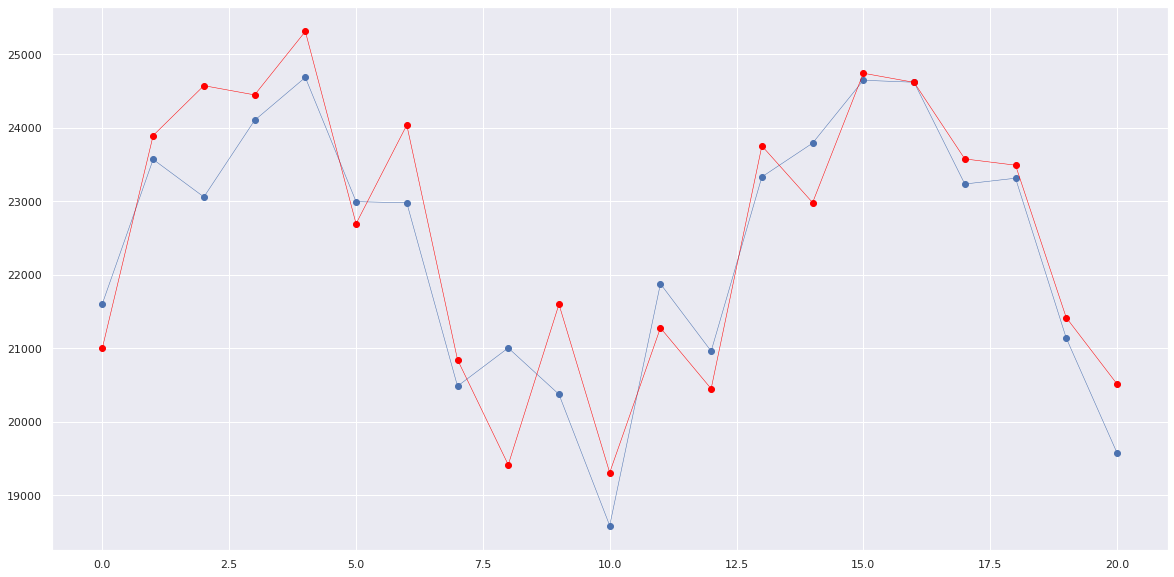

In [155]:
walk_forward_train_evaluate_and_report(series, best_cfg)